# Análisis de los resultados de docking

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os

/home/joel/anaconda3/envs/mds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## RMSD
Carga de los datos de RMSD calculado usando el script de python de autodock Tools.

In [13]:
RES_ReDK_DIR = "/home/joel/Documentos/Doctorado/DOCTO_TESIS/Proteinas_Modelo/CDK2/CDK2/ARCHIVOS/CRISTALES/DOCKINGS/CRISTALS_RESULTS/"
# os.chdir(RES_ReDK_DIR)
# Por ahora sólo nos interesan los resultaods del rmsd del redocking

# RESULTADOS DE AD4
ad4_DEF_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_AD4_DEFAULT_Par/res_DK_DEFAULT_CDK2_crys.csv", index_col = 0).sort_index()
ad4_25M_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_AD4_25M_evals/res_DK_25M_evals_CDK2_crys.csv", index_col = 0).sort_index()
ad4_2_5M_50runs_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_AD4_2_5M_evals_100runs/res_DK_25M_evals_100runs_CDK2_crys.csv", 
                                  index_col = 0).sort_index()

ad4_250K_150runs_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_AD4_250K_evals_150runs/res_DK_250K_evals_100runs_CDK2_crys.csv", 
                                  index_col = 0).sort_index()
ad4_250K_100runs_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_AD4_250K_evals_100runs/res_DK_250K_evals_100runs_CDK2_crys.csv", 
                                  index_col = 0).sort_index()
# RESULTADOS DE VINA
vin_DEF_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_vin_ex8_default/res_VINA_CDK2_crys.csv", index_col = 0, sep='\s*,\s+').sort_index()
vin_128EX_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_vin_ex128/res_VINA_CDK2_crys.csv", index_col = 0).sort_index()
# RESULTADOS DE SMINA
vinardo_DEF_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_SMINA_vinardo_ex8_default/res_vinardo_CDK2_crys.csv", 
                              index_col = 0).sort_index()
vinardo_128EX_res = pd.read_csv(RES_ReDK_DIR + "CDK2_CRYS_DOCK_SMINA_vinardo_ex128/res_vinardo_CDK2_crys.csv", index_col = 0).sort_index()

/home/joel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [14]:
#
vin_DEF_res.RMSD

Ligando
1b38     2.0379
1b39     1.4160
1ckp     7.5194
1di8     1.0954
1dm2     0.4731
1e1v     7.6473
1e1x     7.1489
1e9h     1.2436
1fin     5.5898
1fq1     2.5201
1fvt     7.9281
1fvv     3.0752
1g5s     0.9930
1gih     0.5311
1gii     0.8892
1gij     0.6571
1gy3     3.6004
1gz8     6.1219
1h00     9.9288
1h01     5.8683
1h07     2.2393
1h08     5.8432
1h0v     6.2409
1h0w     7.5230
1h1p     5.1401
1h1q     5.6597
1h1r     7.3729
1h1s     8.9278
1hck     1.2180
1jst     4.6340
         ...   
5fp5     1.8456
5fp6     5.4464
5iev     1.1152
5iex     7.9563
5iey     9.3922
5jq5     1.6519
5jq8     1.1835
5k4j    10.6946
5l2w     0.6934
5lmk     0.9066
5nev     1.7647
5oo1     7.6372
5oo3     2.0698
5osm     3.2791
6gub     0.6852
6guc     0.4088
6gue     0.9478
6guf     5.4831
6guh     0.9736
6guk     0.4790
6gva     1.0008
6q48     3.1342
6q4c     3.5055
6q4d     1.1378
6q4e     5.9401
6q4f    11.8381
6q4g     6.7288
6q4h     1.1873
6q4i     0.8623
6q4j     6.6334
Name: RMSD, Leng

### Se crea un dataframe con únicamente los valores de RMSD

In [6]:
# Dataframe con los datos
df_rmsd = pd.DataFrame({ "ad4_def_LE": ad4_DEF_res[" rmsd_LE"], 
                "ad4_def_LC": ad4_DEF_res[" rmsd_LC"],
                "ad4_25M_LE": ad4_25M_res[" rmsd_LE"], 
                "ad4_25M_LC": ad4_25M_res[" rmsd_LC"],
                "ad4_2.5M_LE": ad4_2_5M_50runs_res[" rmsd_LE"], 
                "ad4_2.5M_LC": ad4_2_5M_50runs_res[" rmsd_LC"],
                #"ad4_250K-100r_LE": ad4_250K_100runs_res[" rmsd_LE"], 
                #"ad4_250K-100r_LC": ad4_250K_100runs_res[" rmsd_LC"],
                "ad4_250K-150r_LE": ad4_250K_150runs_res[" rmsd_LE"], 
                "ad4_250K-150r_LC": ad4_250K_150runs_res[" rmsd_LC"],
                "vina_DEF_8": vin_DEF_res[" RMSD"], 
                "vina_128": vin_128EX_res[" RMSD"], 
                "vinardo_DEF_8" :vinardo_DEF_res[" RMSD"], 
                "vinardo_128": vinardo_128EX_res[" RMSD"]})

In [7]:
df_rmsd.head()

# forloop siniac

,ad4_def_LE,ad4_def_LC,ad4_25M_LE,ad4_25M_LC,ad4_2.5M_LE,ad4_2.5M_LC,ad4_250K-150r_LE,ad4_250K-150r_LC,vina_DEF_8,vina_128,vinardo_DEF_8,vinardo_128
1b38,2.1398,3.5454,4.8538,1.9711,2.2246,2.2246,2.0414,3.2124,2.0379,2.0683,2.2417,4.6020
1b39,1.4432,1.4432,2.1574,1.9905,4.8639,1.3783,2.2929,2.8586,1.4160,1.4784,4.0614,2.1410
1ckp,0.7754,0.7754,1.5584,1.5584,1.5574,1.5574,1.5546,1.5546,7.5194,7.5195,6.1836,6.1839
1di8,7.2172,7.2172,0.8516,7.2499,1.0868,1.0868,1.5367,7.2241,1.0954,1.1126,0.9798,0.9995
1dm2,0.8172,0.8172,0.7998,0.7998,0.6587,0.6587,0.7744,0.7744,0.4731,0.5646,0.2678,0.2683


## Resumen

In [8]:
df_rmsd.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ad4_def_LE,364.0,3.28,3.19,0.11,1.19,1.87,4.84,16.14
ad4_def_LC,364.0,3.39,2.85,0.11,1.23,2.01,5.60,16.02
ad4_25M_LE,364.0,3.36,3.38,0.20,1.13,1.78,5.06,18.39
ad4_25M_LC,364.0,2.75,2.66,0.20,1.09,1.71,2.88,15.94
ad4_2.5M_LE,364.0,3.16,3.22,0.22,1.17,1.76,4.38,18.39
ad4_2.5M_LC,364.0,2.78,2.65,0.22,1.14,1.69,2.98,15.99
ad4_250K-150r_LE,364.0,3.13,3.12,0.14,1.19,1.74,4.28,18.25
ad4_250K-150r_LC,364.0,2.93,2.74,0.14,1.18,1.74,3.71,16.11
vina_DEF_8,364.0,4.18,2.94,0.25,1.50,4.05,6.49,12.87
vina_128,364.0,4.17,3.06,0.24,1.37,3.57,6.61,13.12


### Boxplots

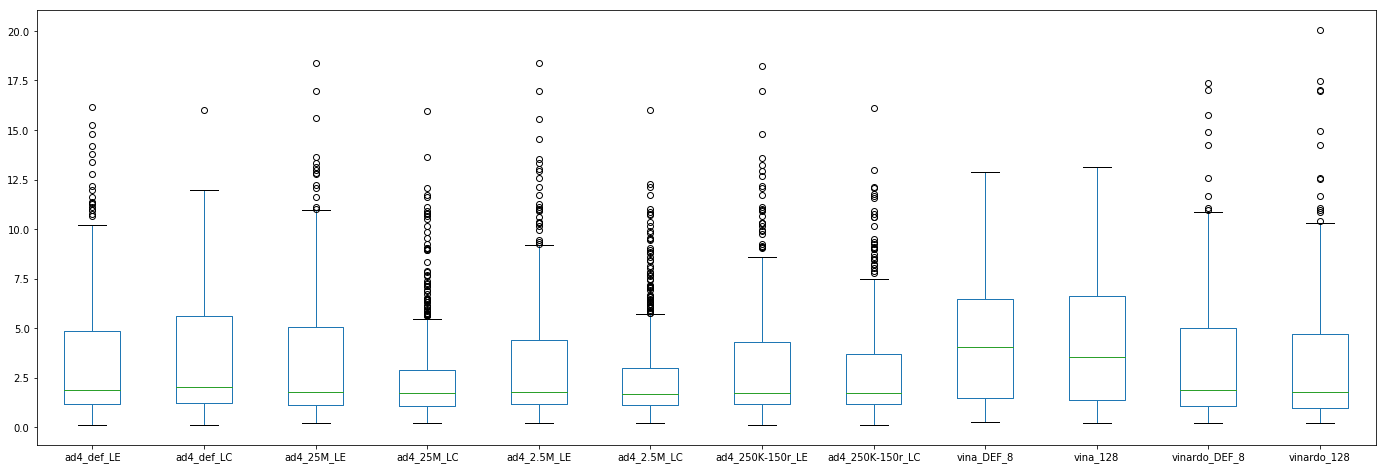

In [9]:
plt.rcParams['figure.figsize'] = [24, 8]
df_rmsd.plot.box();

(-2, 15)

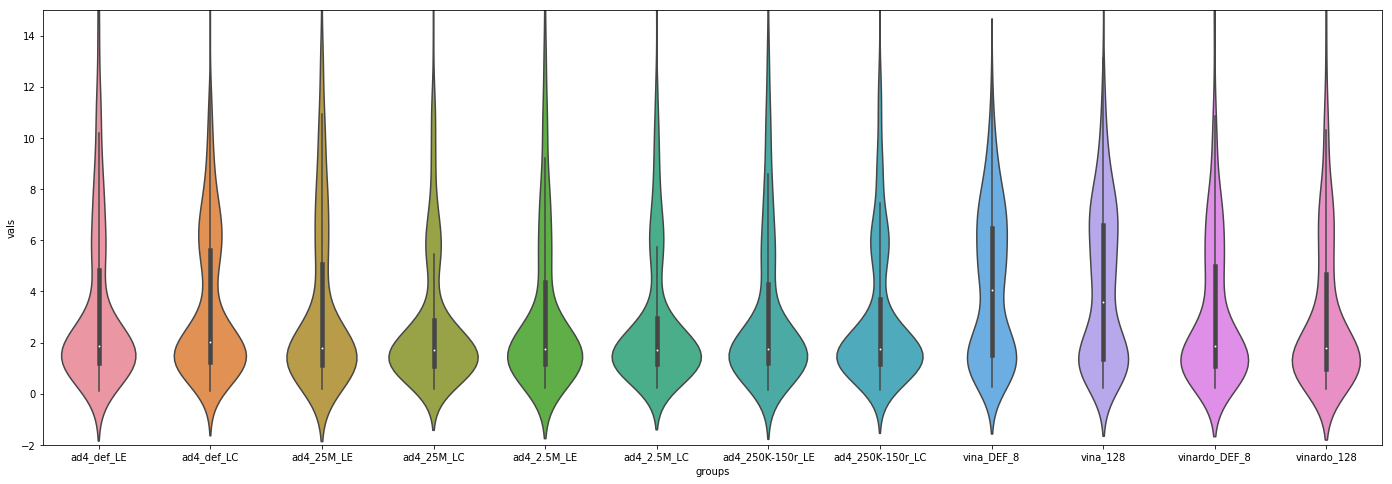

In [17]:
import seaborn as sns
m_df_rmsd = df_rmsd.melt(var_name = 'groups', value_name = 'vals')
#print(m_df_rmsd)
ax = sns.violinplot(x="groups", y="vals", data=m_df_rmsd)
ax.set_ylim([-2, 15]) 

## Density plots

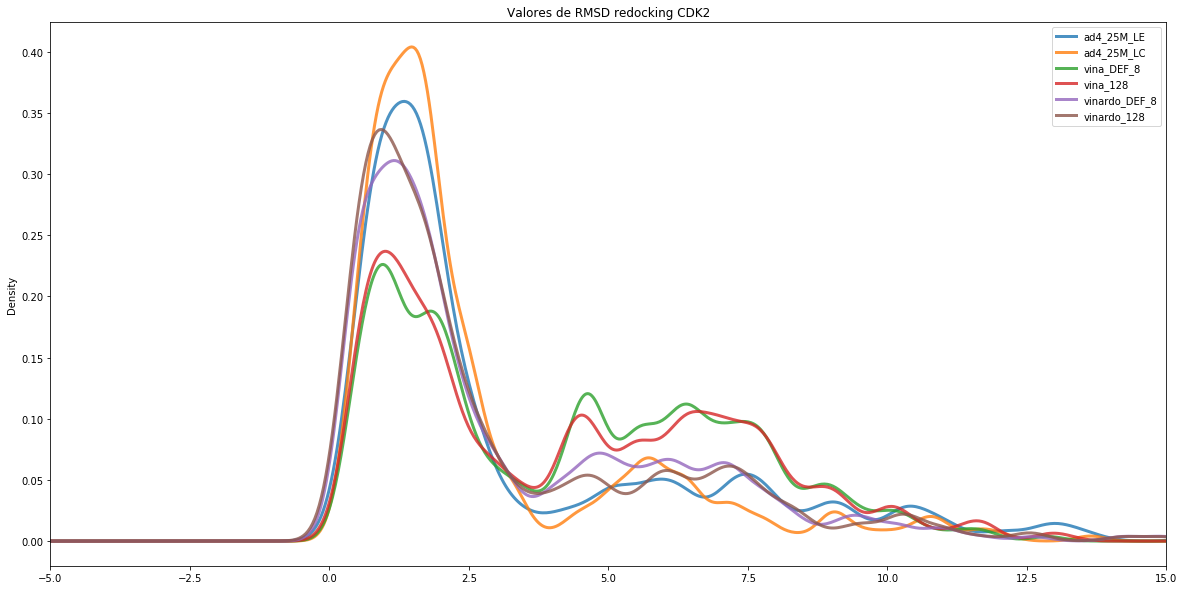

In [293]:
import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]

df_rmsd[[
    #'ad4_def_LE', 'ad4_def_LC', 
    'ad4_25M_LE', 'ad4_25M_LC',
    #'ad4_2.5M_LE', 'ad4_2.5M_LC',
    #'ad4_250K-150r_LE', 'ad4_250K-150r_LC',
    'vina_DEF_8', 'vina_128',
    'vinardo_DEF_8', 'vinardo_128'
]].plot.kde(bw_method = 0.1,  linewidth = 3, alpha = 0.8, 
            title = "Valores de RMSD redocking CDK2", 
            xlim = (-5,15));


## Normalidad

In [259]:
import pylab
import scipy.stats as stats
import statsmodels.api as sm

for i, j in zip(df_rmsd, df_rmsd.T.values):
    norm_t = stats.shapiro(j)
    print(i, '\t', norm_t[1])

ad4_def_LE 	 3.574428726010314e-22
ad4_def_LC 	 1.5557159045536206e-18
ad4_25M_LE 	 4.927510466113768e-22
ad4_25M_LC 	 3.805611734914532e-23
ad4_2.5M_LE 	 4.4946479723783424e-23
ad4_2.5M_LC 	 6.986503061967923e-23
ad4_250K-150r_LE 	 2.9545636623574995e-23
ad4_250K-150r_LC 	 2.607067151946278e-22
vina_DEF_8 	 2.7466835229861264e-12
vina_128 	 4.110028832028656e-13
vinardo_DEF_8 	 4.3748180268297415e-20
vinardo_128 	 6.329845147042366e-22


## Transformar los datos
### Estandarizaci`on (z-score)

In [260]:
# Estandarizamos  cada columna de datos
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rmsd_std = sScaler.fit_transform(df_rmsd)
# Equivalente a:
# pd.DataFrame( stats.zscore(df_rmsd), columns= df_rmsd.columns, index = df_rmsd.index )
# Lo convertimos en un dataframe
df_rmsd_std = pd.DataFrame(rmsd_std, columns= df_rmsd.columns, index = df_rmsd.index)
#df_rmsd_std.head()

### Log10

In [261]:
df_rmsd_log10 = pd.DataFrame( np.log10(df_rmsd), columns= df_rmsd.columns, index = df_rmsd.index )
#df_rmsd_log10.head()

## Normalidad en datos estandarizados/transformados

In [265]:
print('Prueba', '\t\t', 'p (std)', '\t\t', 'p (log10)')
for i, j, k in zip(df_rmsd, df_rmsd_std.T.values, df_rmsd_log10.T.values):
    norm_t_std = stats.shapiro(j); norm_t_log = stats.shapiro(k)
    print(i, '\t', norm_t_std[1], '\t\t', norm_t_log[1])

Prueba 		 p (std) 		 p (log10)
ad4_def_LE 	 3.5743954045256776e-22 		 1.2363204859866528e-07
ad4_def_LC 	 1.5557159045536206e-18 		 1.194002265947347e-07
ad4_25M_LE 	 4.927465027725627e-22 		 7.638952581601188e-08
ad4_25M_LC 	 3.8056839945734503e-23 		 2.129893573510344e-06
ad4_2.5M_LE 	 4.4946479723783424e-23 		 6.860823305032682e-07
ad4_2.5M_LC 	 6.986305531197256e-23 		 1.015046677821374e-06
ad4_250K-150r_LE 	 2.954647912702177e-23 		 2.0168126724229296e-08
ad4_250K-150r_LC 	 2.606994450525253e-22 		 1.1657450471602715e-07
vina_DEF_8 	 2.7468123262042177e-12 		 1.8101277421411766e-11
vina_128 	 4.110028832028656e-13 		 5.7636274225503215e-11
vinardo_DEF_8 	 4.374779575855955e-20 		 2.7285646865493618e-05
vinardo_128 	 6.32990320720499e-22 		 5.976162719889544e-05


## Homocedasticidad

In [283]:
rango = range(0,12)
print(*df_rmsd_std.iloc[:,rango])
stats.levene(*df_rmsd_std.iloc[:,rango].T.values,  center="median")

ad4_def_LE ad4_def_LC ad4_25M_LE ad4_25M_LC ad4_2.5M_LE ad4_2.5M_LC ad4_250K-150r_LE ad4_250K-150r_LC vina_DEF_8 vina_128 vinardo_DEF_8 vinardo_128


LeveneResult(statistic=4.354211836603327, pvalue=1.6252474817219472e-06)

# Kruskal-walis

In [285]:
rango = range(0,12)
print(*df_rmsd_log10.iloc[:,rango])
stats.kruskal(*df_rmsd_std.iloc[:,rango].T.values)

ad4_def_LE ad4_def_LC ad4_25M_LE ad4_25M_LC ad4_2.5M_LE ad4_2.5M_LC ad4_250K-150r_LE ad4_250K-150r_LC vina_DEF_8 vina_128 vinardo_DEF_8 vinardo_128


KruskalResult(statistic=13.413224488312922, pvalue=0.26717702033953505)

## Transformación de los datos

In [20]:
# Q-Q plot
import pylab
import scipy.stats as stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [7, 7]
stats.probplot(ad4_DEF_res[" rmsd_LC"], dist = "norm", plot=pylab)
pylab.show()

In [161]:
x = np.cbrt(ad4_25M_res[" rmsd_LE"])
y = np.cbrt(ad4_25M_res[" rmsd_LC"])
z = ad4_25M_res[" rmsd_LC"]
stats.levene(x, y,  center="median")

LeveneResult(statistic=7.796257964404778, pvalue=0.005373156401174709)

In [147]:
x = ad4_25M_res[" rmsd_LE"]
y = ad4_25M_res[" rmsd_LC"]
z = ad4_25M_res[" rmsd_LC"]
stats.wilcoxon(x, y)

WilcoxonResult(statistic=2632.0, pvalue=0.0002442642929482107)

In [28]:
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()

x = sScaler.fit_transform( np.array(ad4_DEF_res[[" rmsd_LC"]]))[:,0]
w = sScaler.fit_transform( np.array(ad4_DEF_res[[" rmsd_LE"]]))[:,0]
y = sScaler.fit_transform( np.array(ad4_25M_res[[" rmsd_LC"]]))[:,0]
z = sScaler.fit_transform( np.array(ad4_25M_res[[" rmsd_LE"]]))[:,0]
stats.levene(x, y, z, w, center="median")

#plt.hist((rmsd_res), bins= bins)

LeveneResult(statistic=1.4629643496872133, pvalue=0.22289393232622662)

(0.7771522402763367, 6.32990320720499e-22)


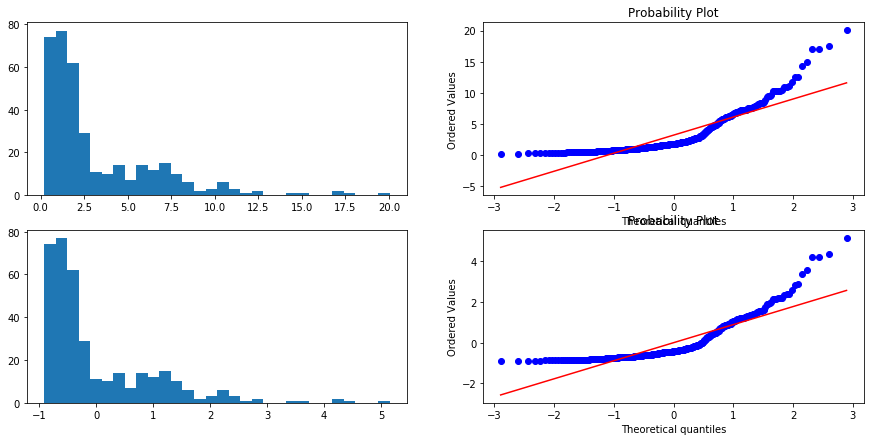

In [33]:
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()

rmsd_res = vinardo_128EX_res[" RMSD"]
trans = sScaler.fit_transform( np.array(vinardo_128EX_res[[" RMSD"]]))
n_t = stats.shapiro(trans)
bins = 30
print(n_t)

plt.subplot(2, 2, 1)
plt.hist(rmsd_res, bins= bins)
plt.subplot(2, 2, 2)
stats.probplot(rmsd_res, dist = "norm", plot=pylab)

plt.subplot(2, 2, 3)
plt.hist(trans[:,0], bins= bins)
plt.subplot(2, 2, 4)
stats.probplot(trans[:,0], dist = "norm", plot=pylab)

pylab.show()

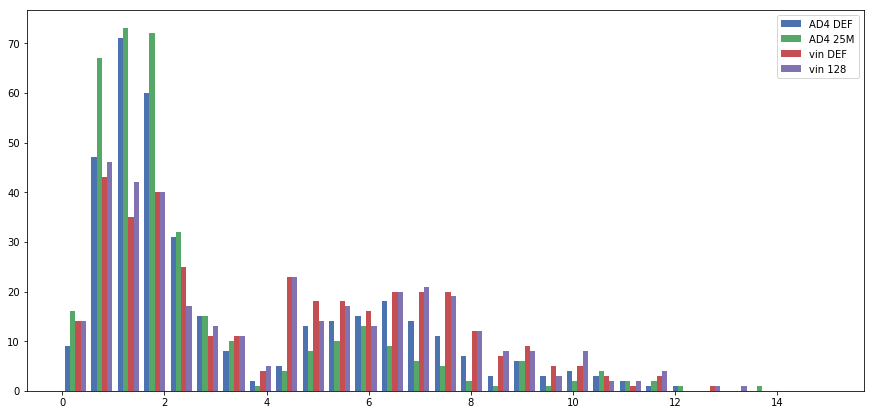

In [76]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
plt.style.use('seaborn-deep')

bins = np.linspace(0, 15, 30)
rmsd_list_res = [ad4_DEF_res[" rmsd_LC"], ad4_25M_res[" rmsd_LC"], vin_DEF_res[" RMSD"], vin_128EX_res[" RMSD"]]
labels = ['AD4 DEF', 'AD4 25M', "vin DEF", "vin 128"]
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', "#fff"]

plt.hist(rmsd_list_res, bins, label = labels,  stacked=True)
plt.legend(loc='upper right')
plt.show()

In [ ]:

plt.rcParams['figure.figsize'] = [15, 7]
bins = np.linspace(0, 15, 30)
rmsd_list_res = [
                 ad4_DEF_res[" rmsd_LE"], ad4_DEF_res[" rmsd_LC"],
                 ad4_25M_res[" rmsd_LE"], ad4_25M_res[" rmsd_LC"],
                 #ad4_25K_100runs_res[" rmsd_LE"], ad4_25K_100runs_res[" rmsd_LC"],
                 vin_DEF_res[" RMSD"], vin_128EX_res[" RMSD"], 
                 vinardo_DEF_res[" RMSD"], vinardo_128EX_res[" RMSD"]
                    ]
labels = [
          'AD4 DEF LE', 'AD4 DEF LC', 
          'AD4 25M LE', 'AD4 25M LC',
          #'AD4 25K100 LE', 'AD4 25K100 LC',
          "VINA DEF", "VINA 128",
          "VINARDO DEF", "VINARDO 128"
        ]
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', "#fff"]

for result, label in zip(rmsd_list_res, labels):
    sns.distplot(result, hist = False, kde = True, kde_kws= {"linewidth": 2}, label = label)

plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')